<a href="https://www.kaggle.com/code/muradpitafi/student-performance-with-deeper-models?scriptVersionId=167038296" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-data/student_data.csv


# Data Collection and Preprocessing

In [2]:
student = pd.read_csv('/kaggle/input/student-performance-data/student_data.csv')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
student.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [4]:
student['Grade'] = (student['G1'] + student['G2'] + student['G3'])/3

In [5]:
student.drop(['G1','G2','G3'], axis = 1, inplace = True)

In [6]:
student.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
Grade         0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')
encoder = LabelEncoder()
for i in student.columns:
    if student[i].dtype == 'object':
        student[i] = encoder.fit_transform(student[[i]])

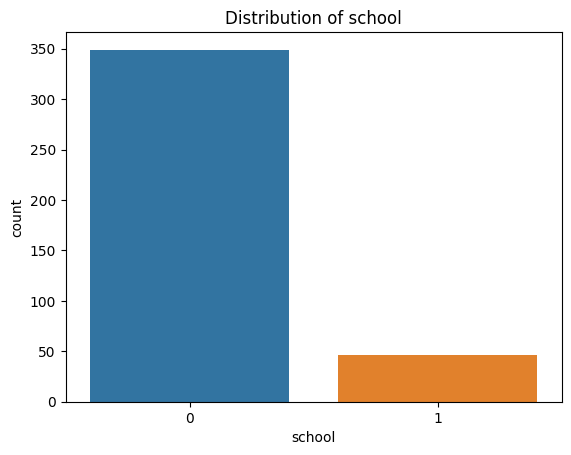

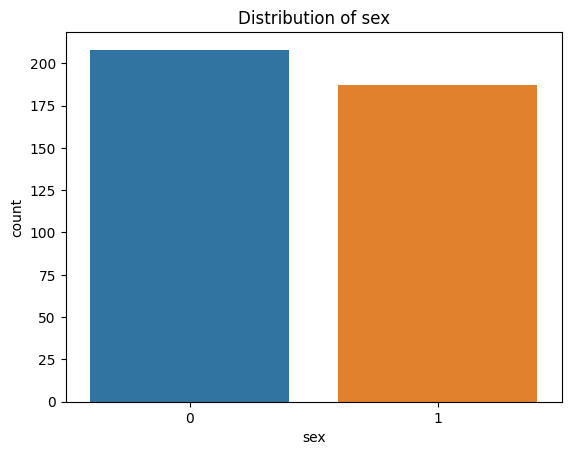

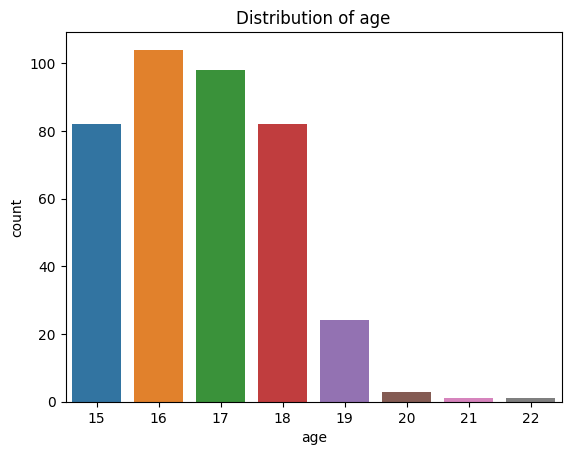

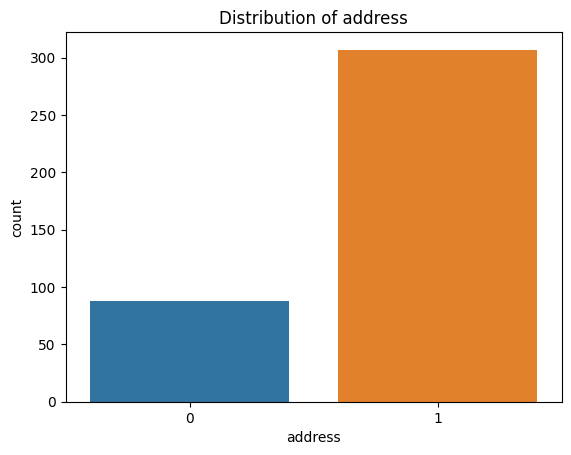

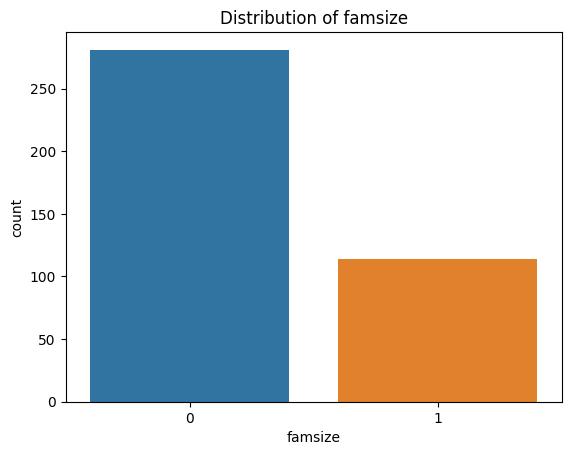

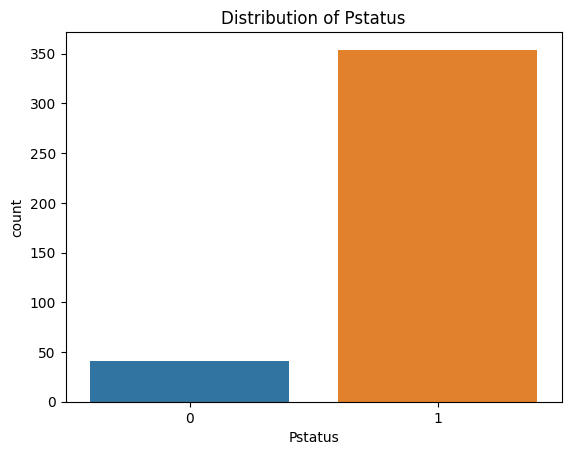

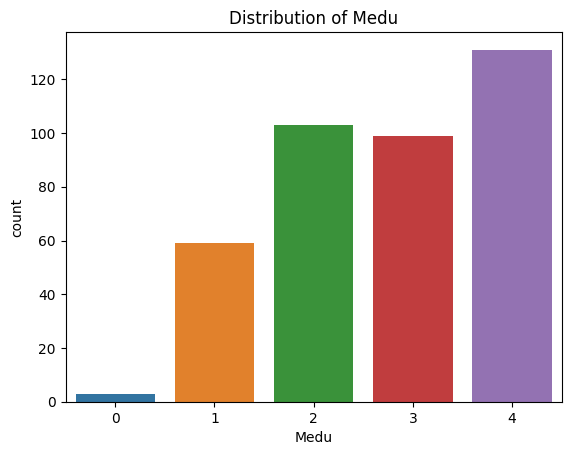

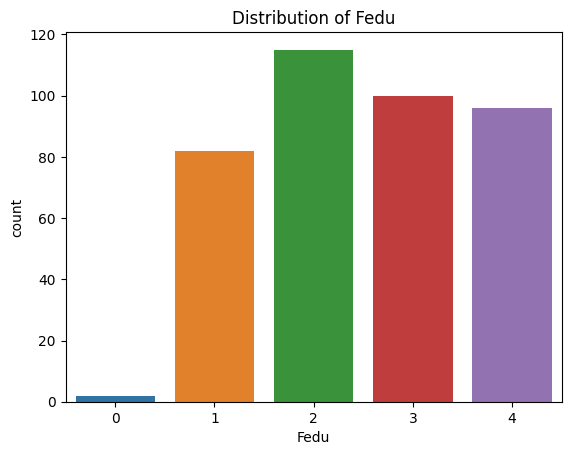

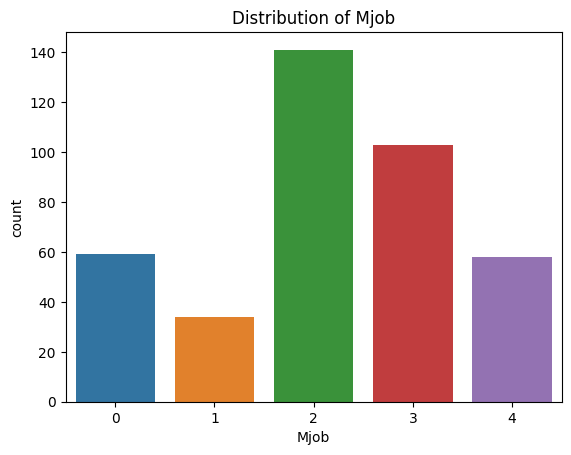

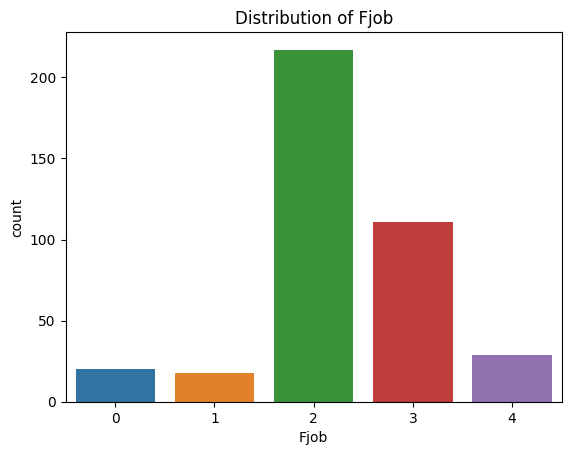

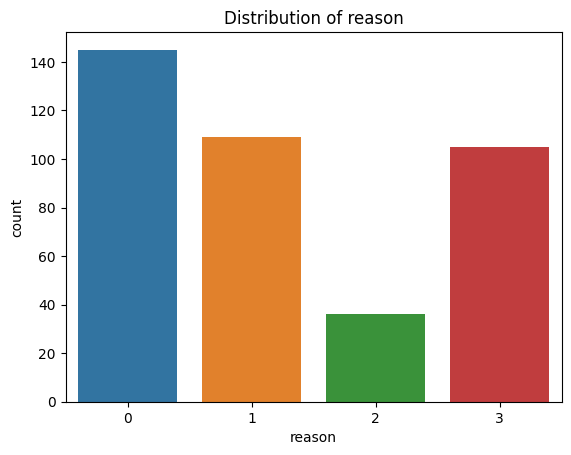

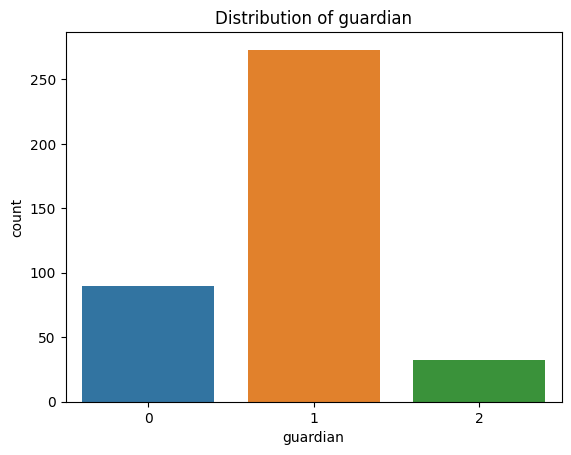

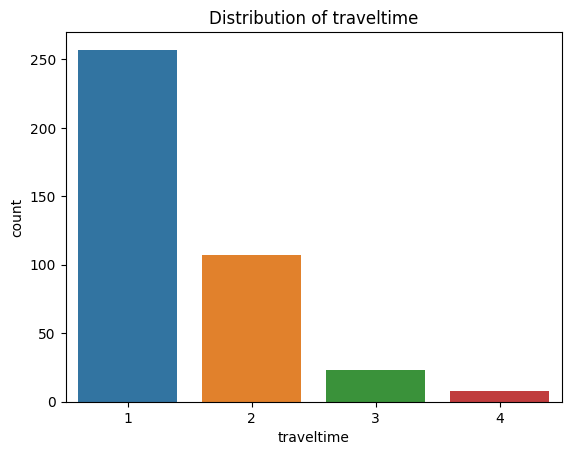

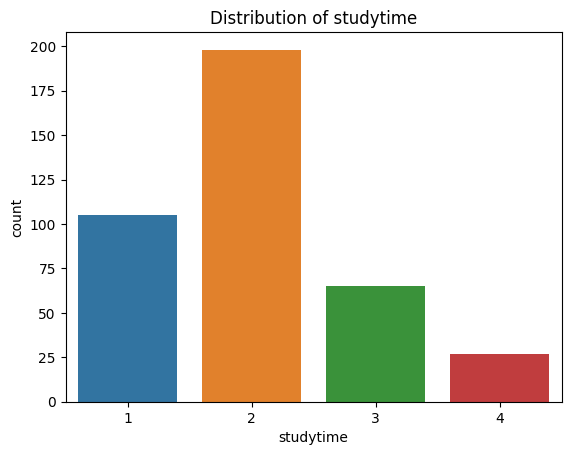

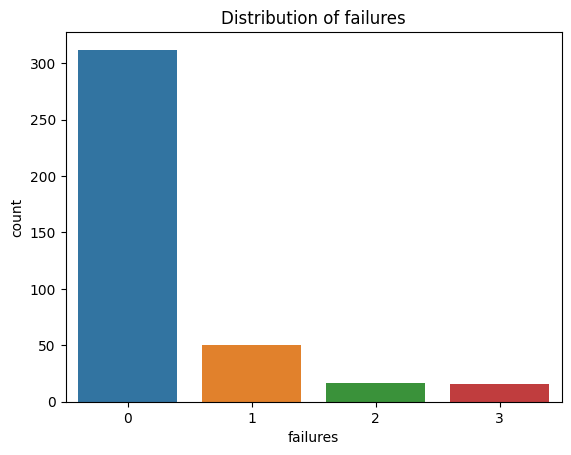

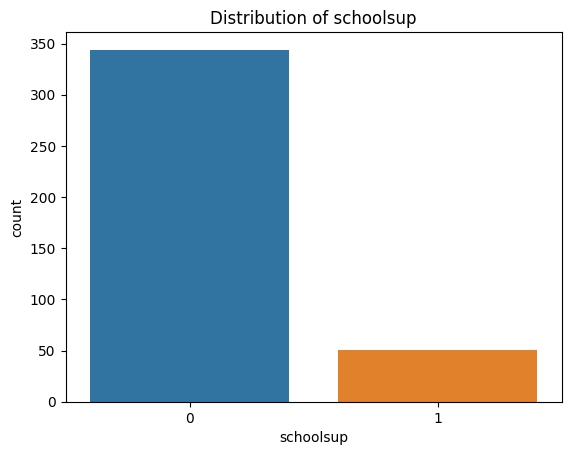

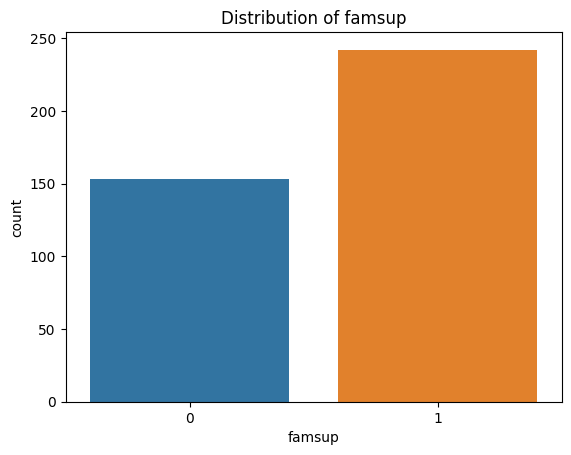

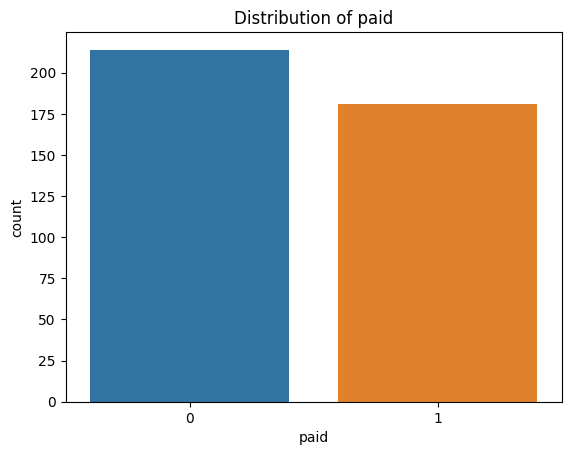

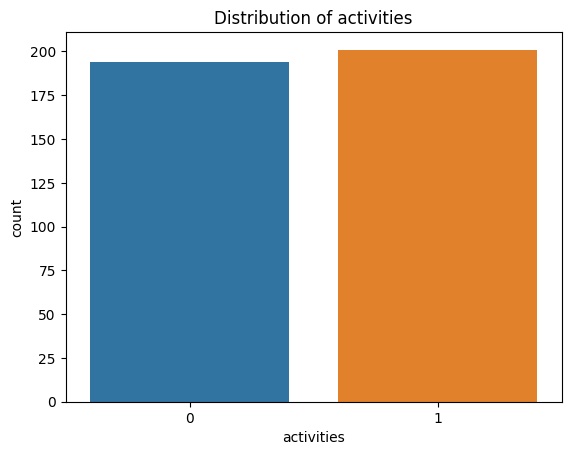

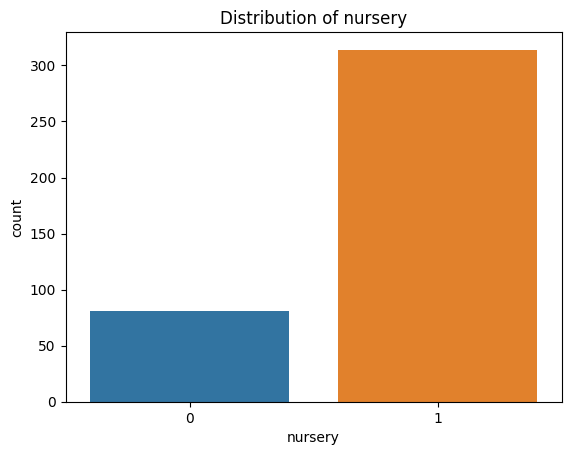

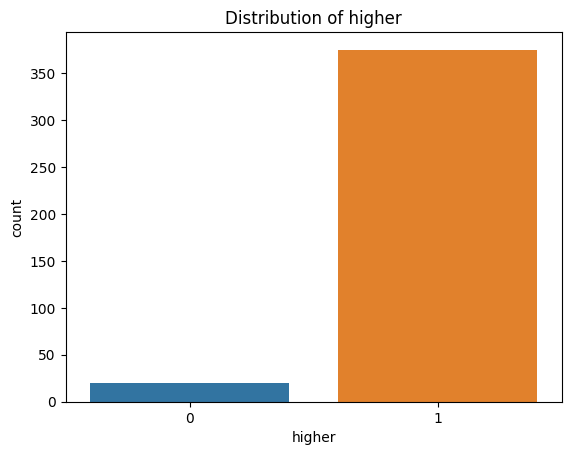

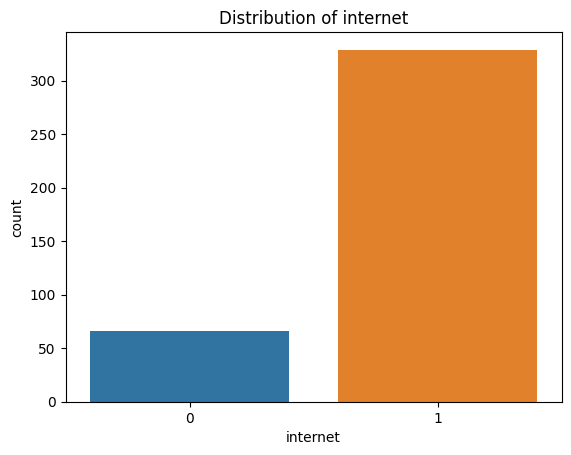

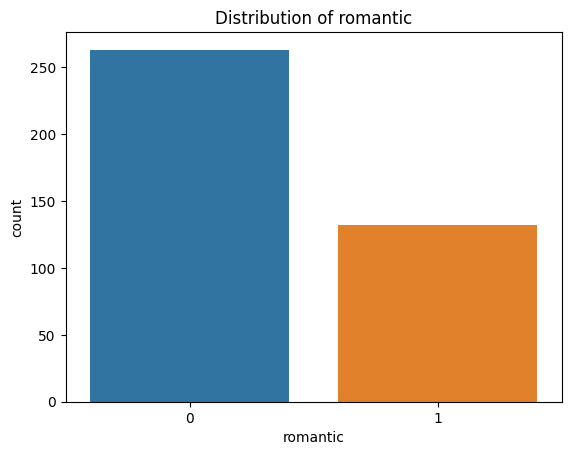

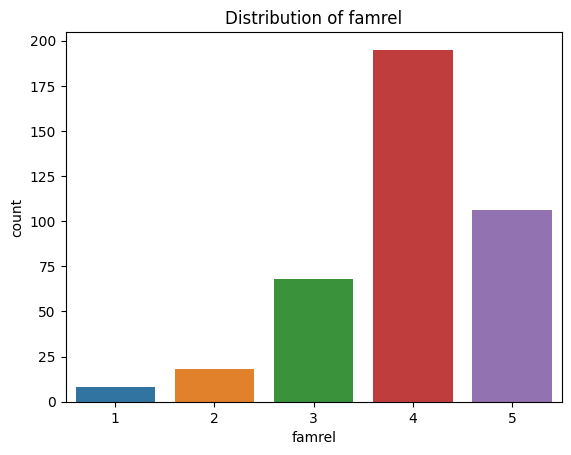

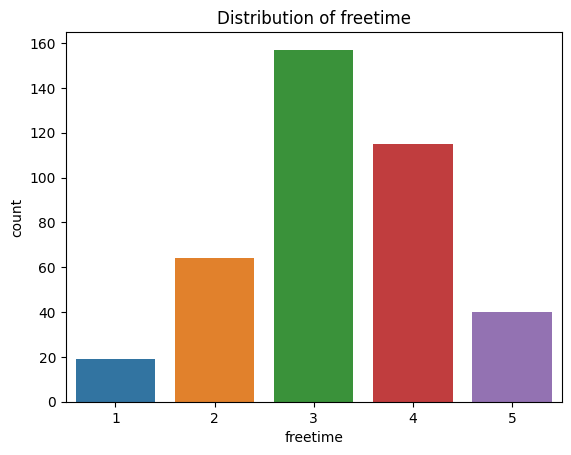

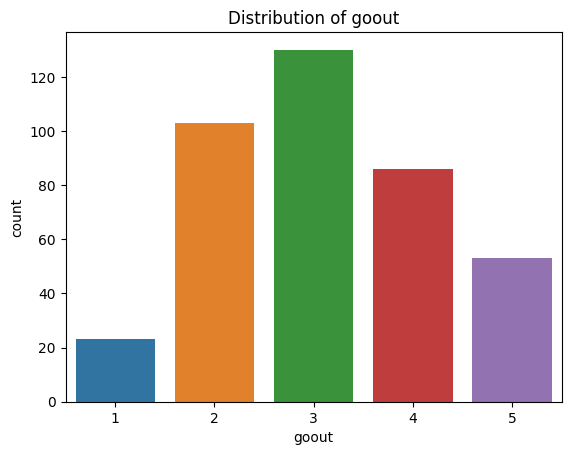

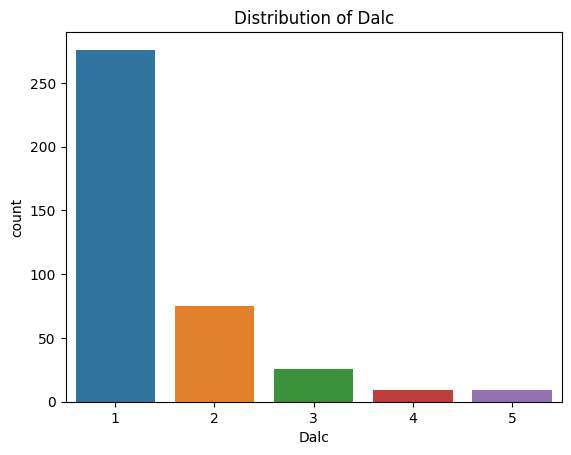

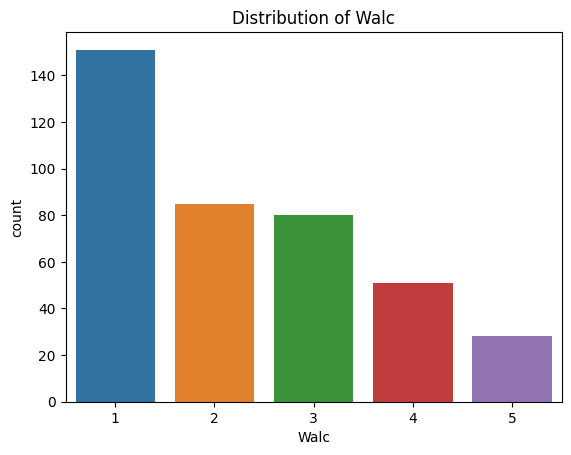

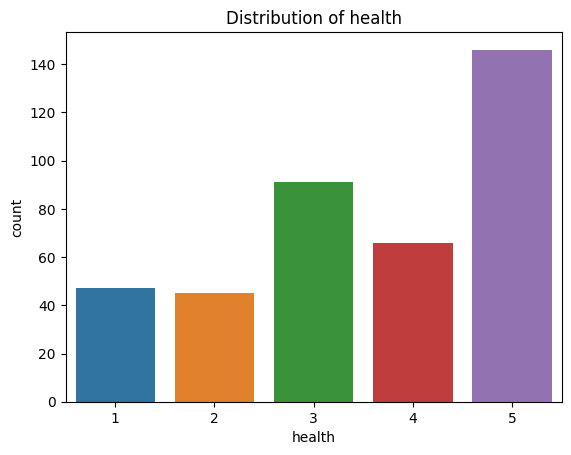

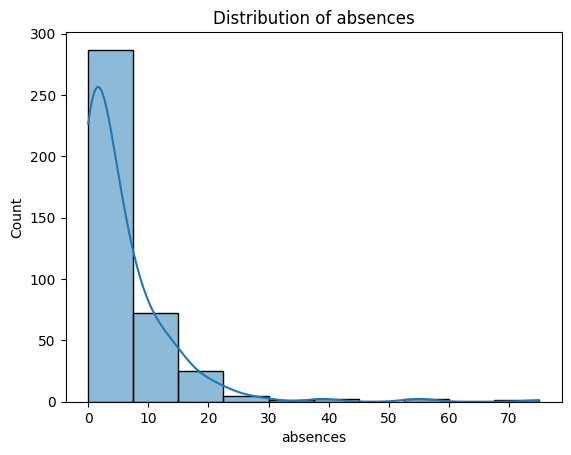

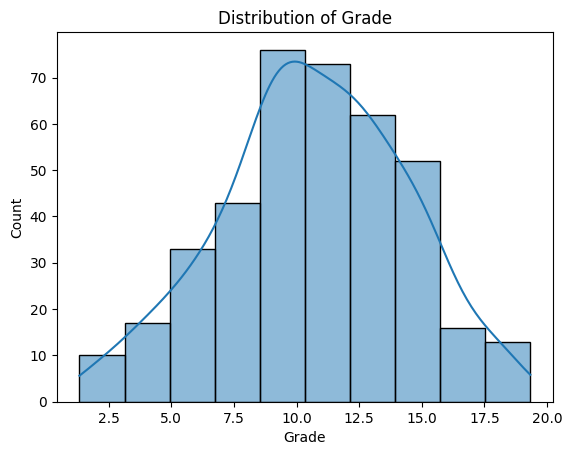

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt

# to see the distribution
for i in student.columns:
    if student[i].nunique() <= 10:
        plt.title(f'Distribution of {i}')
        sns.countplot(x = i, data = student)
        plt.show()
    else:
        plt.title(f'Distribution of {i}')
        sns.histplot(x = i, data = student, kde = True, bins = 10)
        plt.show()

# Model Building 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential


2024-03-14 18:42:03.054310: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-14 18:42:03.054455: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-14 18:42:03.196811: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
x = student.drop(['Grade'], axis = 1)
y = student['Grade']

xtrain, xtest, ytrain , ytest = train_test_split(x,y, test_size = 0.2, random_state = 42)



## Tradition Regression models

In [11]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    #'LogisticRegression': LogisticRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

## Deeper Neural Network Model

In [12]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (30,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'Adam', metrics = ['mean_absolute_error'])

## Neural Network with Regularization 

In [13]:
from tensorflow.keras.regularizers import l2
model_reg = Sequential()
model_reg.add(Dense(64, activation = 'relu', kernel_regularizer=l2(0.1),
               bias_regularizer=l2(0.1)))
model_reg.add(Dense(64, activation = 'relu', kernel_regularizer=l2(0.1),bias_regularizer=l2(0.1)))
model_reg.add(Dense(1, activation = 'linear', kernel_regularizer=l2(0.1),
               bias_regularizer=l2(0.1)))


model_reg.compile(loss = 'mean_squared_error', optimizer = 'Adam', metrics = ['mean_absolute_error'])

# Model Evaluation 

In [14]:
for name , model_ in models.items():
    model_.fit(xtrain, ytrain)
    print(f'Model: {name} -> {model_.score(xtest, ytest)}')

Model: LinearRegression -> 0.17617994865771558
Model: Lasso -> -0.0030065350044854444
Model: Ridge -> 0.17860410284175743
Model: RandomForestRegressor -> 0.30925677420441056
Model: GradientBoostingRegressor -> 0.3207024154471948


In [15]:
model.summary()
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                   epochs = 50, batch_size = 16)

prediction = model.predict(xtest)
for i in range(1):
    print(f'prediction : {prediction[i]} \n true value : {ytest[i]}')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 79.8430 - mean_absolute_error: 7.7636 - val_loss: 18.4683 - val_mean_absolute_error: 3.5137
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.5908 - mean_absolute_error: 3.3165 - val_loss: 17.3755 - val_mean_absolute_error: 3.4354
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.8402 - mean_absolute_error: 2.8944 - val_loss: 15.3625 - val_mean_absolute_error: 3.2319
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.2430 - mean_absolute_error: 2.7328 - val_loss: 15.0576 - val_mean_absolute_error: 3.2100
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.9010 - mean_absolute_error: 2.7873 - val_loss: 14.6205 - val_mean_absolute_error: 3.1696
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.2154 - mean_absolute_error: 2.8260 - val_loss: 14.7931 - val_mean_absolute_error: 3.1811
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0152 - mean_absolute_error: 2.7726 - v

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5386 - mean_absolute_error: 1.8453 - val_loss: 10.9734 - val_mean_absolute_error: 2.7390
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2592 - mean_absolute_error: 1.8295 - val_loss: 11.1186 - val_mean_absolute_error: 2.7515
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7794 - mean_absolute_error: 1.7340 - val_loss: 11.3131 - val_mean_absolute_error: 2.7636
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0215 - mean_absolute_error: 1.7403 - val_loss: 11.1490 - val_mean_absolute_error: 2.7392
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6418 - mean_absolute_error: 1.7192 - val_loss: 11.6781 - val_mean_absolute_error: 2.7619
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6999 - mean_absolute_error: 1.7194 - val_loss: 10.9561 - val_mean_absolute_error: 2.6840
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9859 - mean_absolute_error: 1.7620 - val_loss:

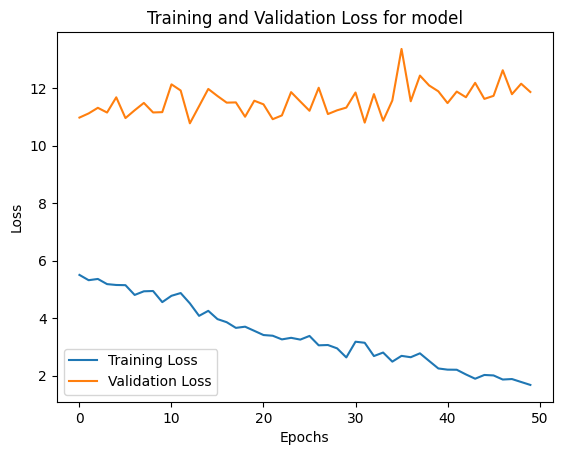

In [16]:
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=50, batch_size=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for model')
plt.legend()
plt.show()

In [17]:
model_reg.summary()
history = model_reg.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                   epochs = 50, batch_size = 16)

prediction = model_reg.predict(xtest)
for i in range(1):
    print(f'prediction : {prediction[i]} \n true value : {ytest[i]}')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 83.4418 - mean_absolute_error: 7.5084 - val_loss: 29.6532 - val_mean_absolute_error: 3.6834
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.8114 - mean_absolute_error: 3.3849 - val_loss: 25.9290 - val_mean_absolute_error: 3.5319
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.7116 - mean_absolute_error: 3.1737 - val_loss: 23.5293 - val_mean_absolute_error: 3.3845
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.5442 - mean_absolute_error: 3.0172 - val_loss: 21.9599 - val_mean_absolute_error: 3.2588
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.6380 - mean_absolute_error: 2.8010 - val_loss: 21.0569 - val_mean_absolute_error: 3.2245
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.9882 - mean_absolute_error: 2.8232 - val_loss: 20.4840 - val_mean_absolute_error: 3.1751
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.2719 - mean_absolute_error: 2.7569 - v

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.8693 - mean_absolute_error: 2.3574 - val_loss: 14.7211 - val_mean_absolute_error: 2.9050
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.0405 - mean_absolute_error: 2.2302 - val_loss: 15.3320 - val_mean_absolute_error: 2.9751
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.5422 - mean_absolute_error: 2.2129 - val_loss: 15.0395 - val_mean_absolute_error: 2.9198
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.1200 - mean_absolute_error: 2.2846 - val_loss: 15.0079 - val_mean_absolute_error: 2.9399
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.5453 - mean_absolute_error: 2.1988 - val_loss: 14.7170 - val_mean_absolute_error: 2.9021
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3943 - mean_absolute_error: 2.2929 - val_loss: 15.2396 - val_mean_absolute_error: 2.9542
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5129 - mean_absolute_error: 1.9753 - val

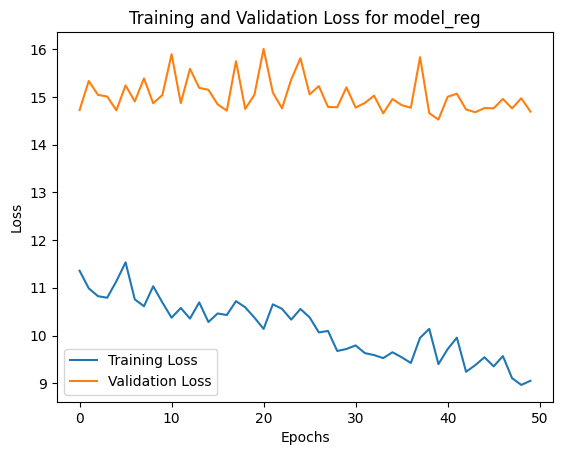

In [18]:
history_reg = model_reg.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=50, batch_size=16)

plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for model_reg')
plt.legend()
plt.show()

# Documentation and Reporting 

**Title:** Comparative Analysis of Traditional and Deep Learning Models for Student Grade Prediction

**Abstract:**
This academic documentation presents a comparative analysis of traditional regression models and deep learning models for predicting student grades. The study utilizes a dataset containing various attributes of students, such as demographics, study habits, and performance metrics, to predict their final grades. Traditional regression models including Linear Regression, Lasso Regression, Ridge Regression, RandomForestRegressor, and GradientBoostingRegressor are compared against deep learning models including a simple feedforward neural network and a deep neural network with regularization.

**Introduction:**
Predicting student performance is a critical task in educational research and practice. Understanding the factors that influence student grades can help educators identify at-risk students and implement targeted interventions to improve their academic outcomes. Traditional regression models have been widely used for this purpose, but recent advancements in deep learning offer the potential for more accurate predictions by capturing complex relationships in the data.

**Methodology:**
The study begins by preprocessing the dataset, including feature engineering and splitting the data into training and testing sets using a 80-20 ratio. For traditional regression models, Linear Regression, Lasso Regression, Ridge Regression, RandomForestRegressor, and GradientBoostingRegressor are implemented using scikit-learn library. For deep learning models, a simple feedforward neural network and a deep neural network with regularization are implemented using the TensorFlow framework.

**Results:**
The traditional regression models are evaluated based on mean squared error (MSE) and mean absolute error (MAE) metrics. Results show that RandomForestRegressor and GradientBoostingRegressor outperform other models, achieving MSE scores of 14.66 and 13.65 respectively. 
The deep learning models are evaluated using the same metrics. The feedforward neural network achieves a MSE of 0.2565 and MAE of 0.3830 on the test set, while the deep neural network with regularization achieves a MSE of 12.51 and MAE of 2.4324. 

**Discussion:**
The comparative analysis reveals that while traditional regression models perform reasonably well, deep learning models offer the potential for better predictive accuracy. However, the deep neural network with regularization exhibits higher variability and overfitting compared to the feedforward neural network. Further research is needed to fine-tune hyperparameters and improve the robustness of deep learning models for student grade prediction.

**Conclusion:**
In conclusion, this study highlights the effectiveness of both traditional regression models and deep learning models for student grade prediction. While traditional models provide a solid baseline, deep learning models offer the potential for improved accuracy, albeit with higher complexity and computational requirements. Further research is warranted to explore additional regularization techniques and optimize hyperparameters for better generalization performance. 
 